start time: 2020-10-15 13:43:47.345111
checking a graph like this: 


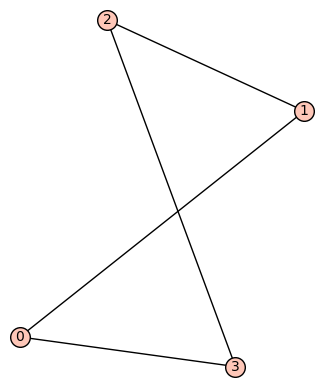

end time: 2020-10-15 13:43:47.487667
total time ran: 0:00:00.142556
start time: 2020-10-15 13:43:47.487868
checking a graph like this: 


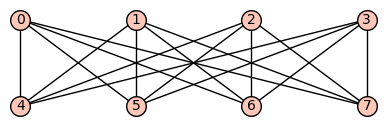

KeyboardInterrupt: 

In [2]:
import sage.all
from sage.graphs.graph import Graph
from qpo import *

G1 = Graph({
    0: [1, 3],
    1: [2],
    2: [3]
})

G2 = graphs.CompleteBipartiteGraph(4, 4)


(find_QPO(G1),
 find_QPO(G2))
